# FINAL PROJECT

### Importing and cleaning train dataset

In [1]:
# Impoting train dataframe
import pandas as pd

df2=pd.read_csv("/content/drive/MyDrive/Cross Selling/Train.csv", dtype={"sexo":str, "ind_nuevo":str,
                                      "ult_fec_cli_1t":str,
                                      "indext":str},nrows=7e5)

<ipython-input-1-d6fec11c484f>:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("/content/drive/MyDrive/Cross Selling/Train.csv", dtype={"sexo":str, "ind_nuevo":str,


In [14]:
df2.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [2]:
print('Number of rows in train set', df2.shape[0])
print('Number of Unique Customer in train set:', len(set(df2.ncodpers.unique())))


Number of rows in train set 700000
Number of Unique Customer in train set: 625587


In [3]:
# dropping any duplicate from the ncodpers column
df2['ncodpers'].duplicated().any().sum()
df2.drop_duplicates(subset='ncodpers', inplace=True)
df2['ncodpers'].duplicated().any().sum()

0

In [ ]:
df2.info()

In [ ]:
# Checking for missing values
df2.isnull().sum()

In [5]:
# Dropping na in the 3 following columbs columns
column_names=["ind_empleado","ind_nuevo","indresi"]
df2.dropna(subset=column_names, inplace=True)

In [6]:
# Dropping 2 columns that are almost completely empty so they are useless
df2 = df2.drop(["ult_fec_cli_1t", "conyuemp"], axis=1)

In [7]:
# Changing data tyes to numeric
df2['age'] = pd.to_numeric(df2['age'], errors = 'coerce')
df2['antiguedad']= pd.to_numeric(df2['antiguedad'], errors = 'coerce')
df2['indrel_1mes'].indrel_1mes = pd.to_numeric(df2['indrel_1mes'], errors = 'coerce')

In [8]:
# Handling missing values in columns ind_nomina_ult1 and ind_nom_pens_ult1 by replacing them by 0
df2.loc[df2['ind_nomina_ult1'].isnull(), "ind_nomina_ult1"] = 0
df2.loc[df2['ind_nom_pens_ult1'].isnull(), "ind_nom_pens_ult1"] = 0

# Handling missing values in the 'nompov' column
df2.loc[df2.nomprov.isnull(),"nomprov"] = "UNKNOWN"

# Handling missaing values in 'ind_empleado'column
df2.loc[df2['ind_empleado'].isnull(), "ind_empleado"] = "N"

### Vizualizations

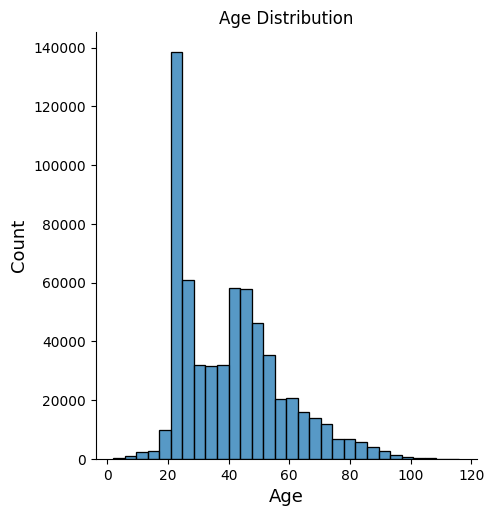

In [9]:
# visualization of the "age" colomn
import seaborn as sns
import matplotlib.pyplot as plt

df2["age"].fillna(df2["age"].mean(),inplace=True)
df2["age"] = df2["age"].astype(int)


sns.displot(df2['age'].dropna(),bins=30)
plt.title("Age Distribution")
plt.xlabel("Age", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.show()

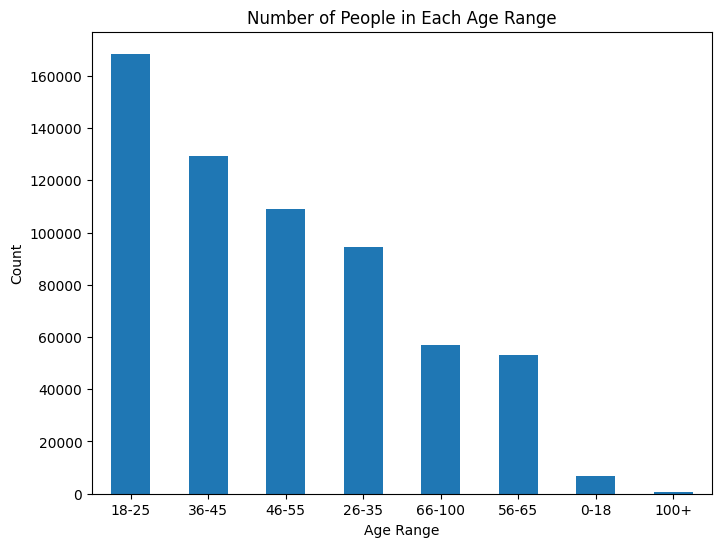

In [14]:

df=df2
#the age ranges
age_ranges = ['0-18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-100','100+']

# Creating a new column with age ranges
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65,100, df['age'].max()], labels=age_ranges)

# number of people in each age range
age_range_counts = df['age_range'].value_counts()

# Plot chart
plt.figure(figsize=(8, 6))
age_range_counts.plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of People in Each Age Range')
plt.xticks(rotation='horizontal')
plt.show()



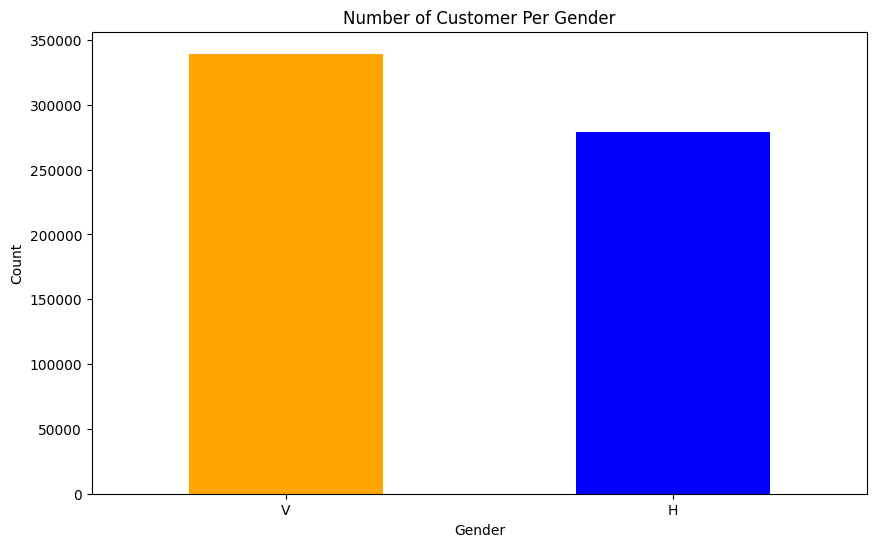

In [43]:

diff_sex=df['sexo'].value_counts()

diff_sex.plot(kind='bar',color=['orange','blue'], figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Customer Per Gender')
plt.xticks(rotation='horizontal')
plt.show()

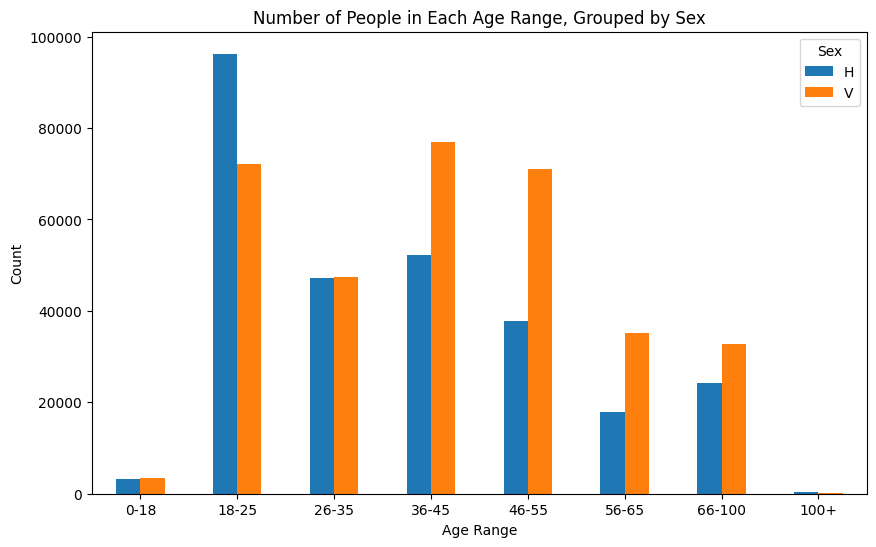

In [31]:

#  the age ranges
age_ranges = ['0-18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-100','100+']

# Create a new column with age ranges
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65,100, df['age'].max()], labels=age_ranges)

# number of people in each age range, grouped by sex
age_range_counts = df.groupby(['age_range', 'sexo']).size().unstack()

# Plot the bar chart
age_range_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of People in Each Age Range, Grouped by Sex')
plt.xticks(rotation='horizontal')
plt.legend(title='Sex')
plt.show()


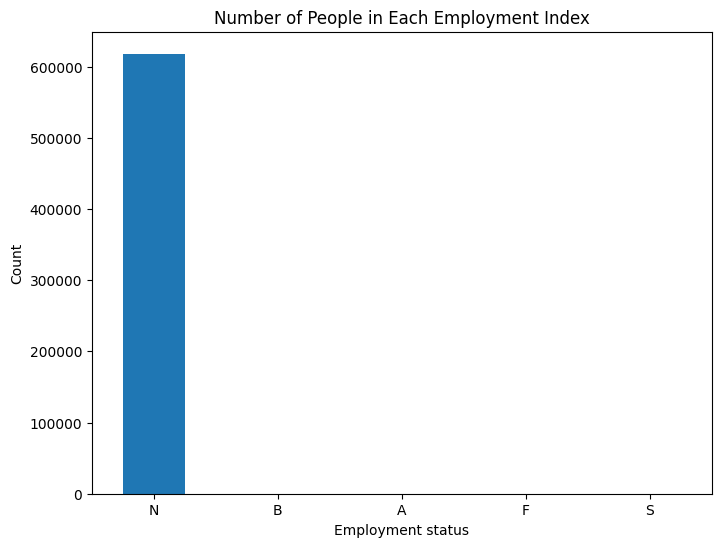

In [26]:
# Count the number of customers that are employed and those that are not

# df['ind_empleado']=df['ind_empleado'].astype(str)
values=df['ind_empleado'].value_counts()
values

plt.figure(figsize=(8, 6))
values.plot(kind='bar')
plt.xlabel('Employment status')
plt.ylabel('Count')
plt.title('Number of People in Each Employment Index')
plt.xticks(rotation='horizontal')
plt.show()

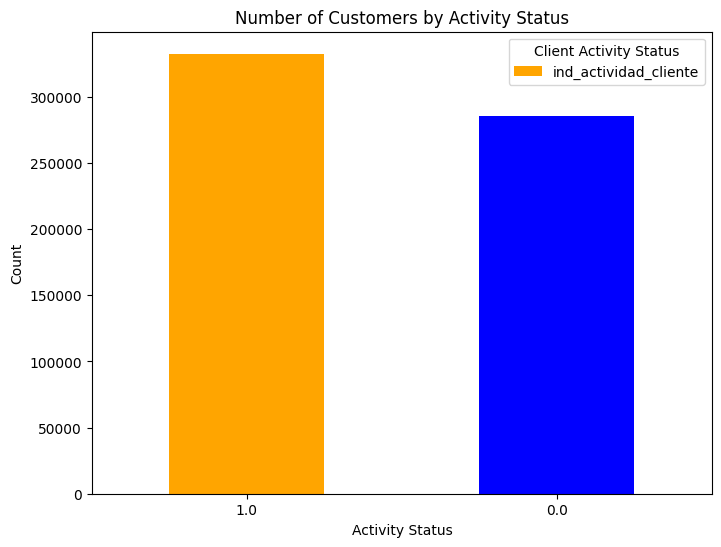

In [56]:
values=df['ind_actividad_cliente'].value_counts()
values

plt.figure(figsize=(8, 6))
values.plot(kind='bar',color=['orange','blue'])
plt.xlabel('Activity Status')
plt.ylabel('Count')
plt.title('Number of Customers by Activity Status')
plt.show()

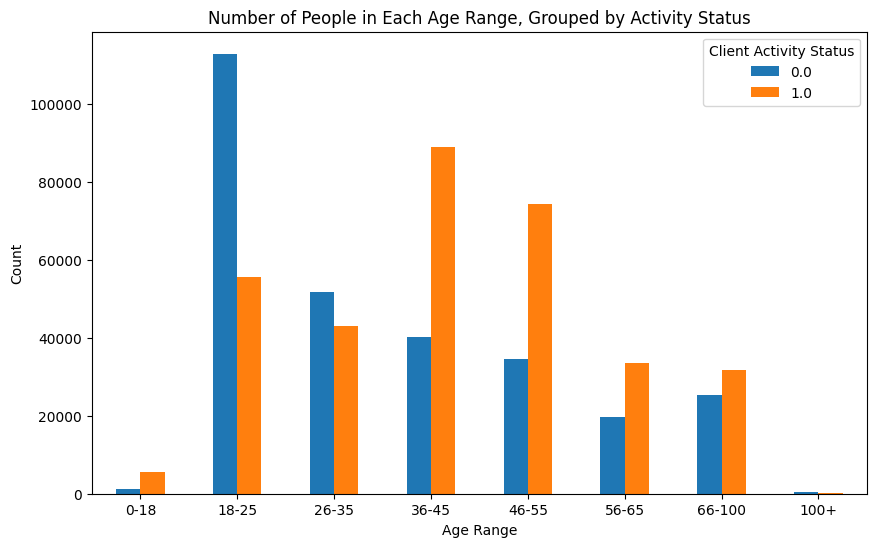

In [47]:

#  the age ranges
age_ranges = ['0-18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-100','100+']

# Create a new column with age ranges
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65,100, df['age'].max()], labels=age_ranges)

# number of people in each age range, grouped by sex
age_range_counts = df.groupby(['age_range','ind_actividad_cliente']).size().unstack()

# Plot the bar chart
age_range_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of People in Each Age Range, Grouped by Activity Status')
plt.xticks(rotation='horizontal')
plt.legend(title='Client Activity Status')
plt.show()

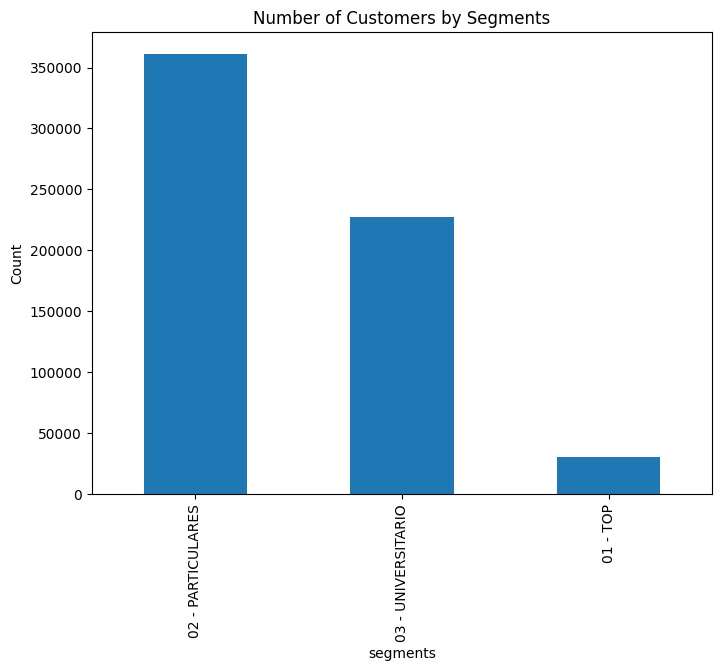

In [59]:
values=df['segmento'].value_counts()
values

plt.figure(figsize=(8, 6))
values.plot(kind='bar')
plt.xlabel('segments')
plt.ylabel('Count')
plt.title('Number of Customers by Segments')
plt.show()

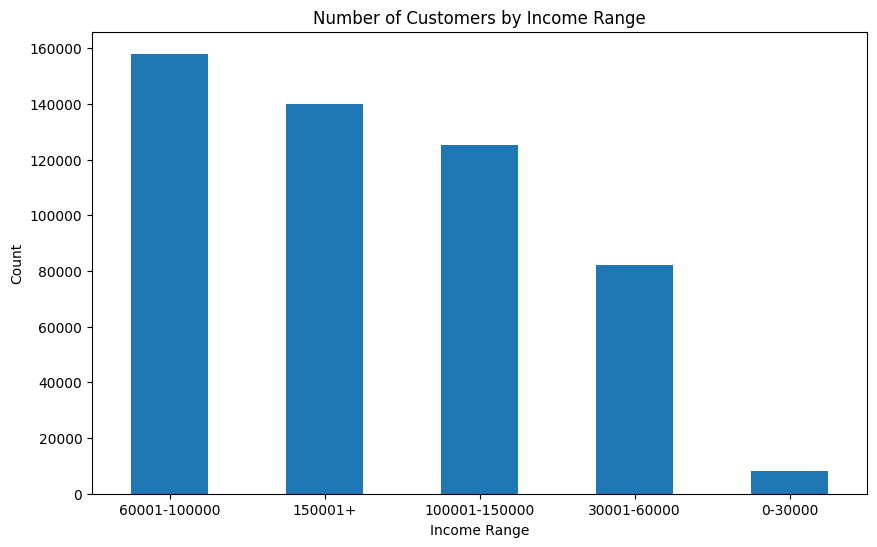

In [67]:

# the income ranges
income_ranges = ['0-30000', '30001-60000', '60001-100000', '100001-150000', '150001+']

# Create a new column with income ranges
df['income_range'] = pd.cut(df['renta'], bins=[0, 30000, 60000, 100000, 150000, df['renta'].max()], labels=income_ranges)

# number of customers in each income range
income_range_counts = df['income_range'].value_counts()

# Plot chart
plt.figure(figsize=(10, 6))
income_range_counts.plot(kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Number of Customers by Income Range')
plt.xticks(rotation='horizontal')
plt.show()


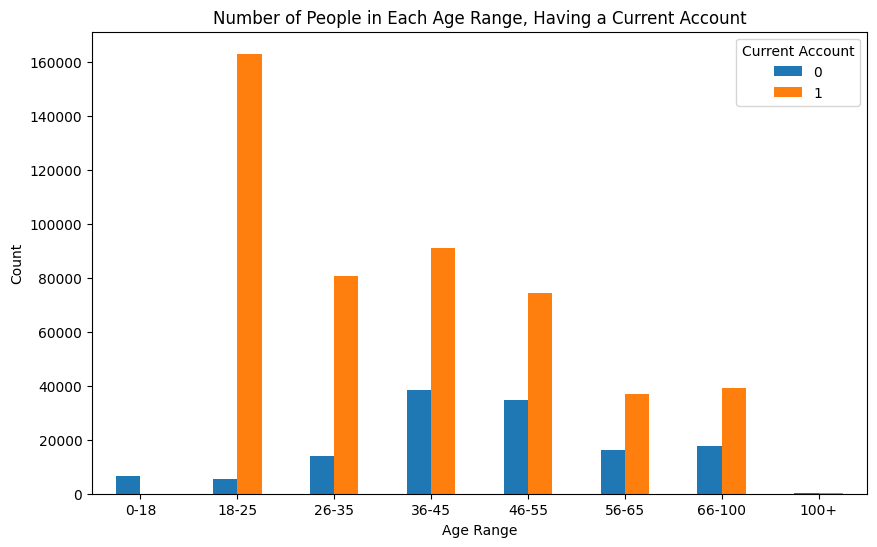

In [69]:
# ind_cco_fin_ult1
#  the age ranges
age_ranges = ['0-18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-100','100+']

# Create a new column with age ranges
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65,100, df['age'].max()], labels=age_ranges)

# number of people in each age range, grouped by current account
age_range_counts = df.groupby(['age_range','ind_cco_fin_ult1']).size().unstack()

# Plot the bar chart
age_range_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of People in Each Age Range, Having a Current Account')
plt.xticks(rotation='horizontal')
plt.legend(title='Current Account')
plt.show()

<Figure size 1400x800 with 0 Axes>

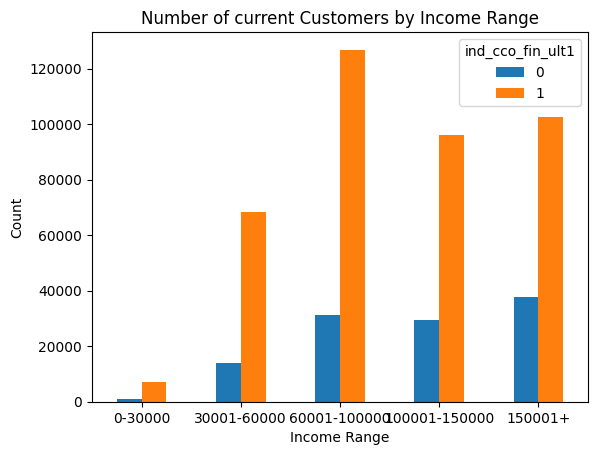

In [84]:
# Current  Account
# the income ranges
income_ranges = ['0-30000', '30001-60000', '60001-100000', '100001-150000', '150001+']

# income ranges column
df['income_range'] = pd.cut(df['renta'], bins=[0, 30000, 60000, 100000, 150000, df['renta'].max()], labels=income_ranges)

# number of customers in each income range
income_range_counts = df.groupby(['income_range','ind_cco_fin_ult1']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(14, 8))
income_range_counts.plot(kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Number of current Customers by Income Range')
plt.xticks(rotation='horizontal')
plt.show()

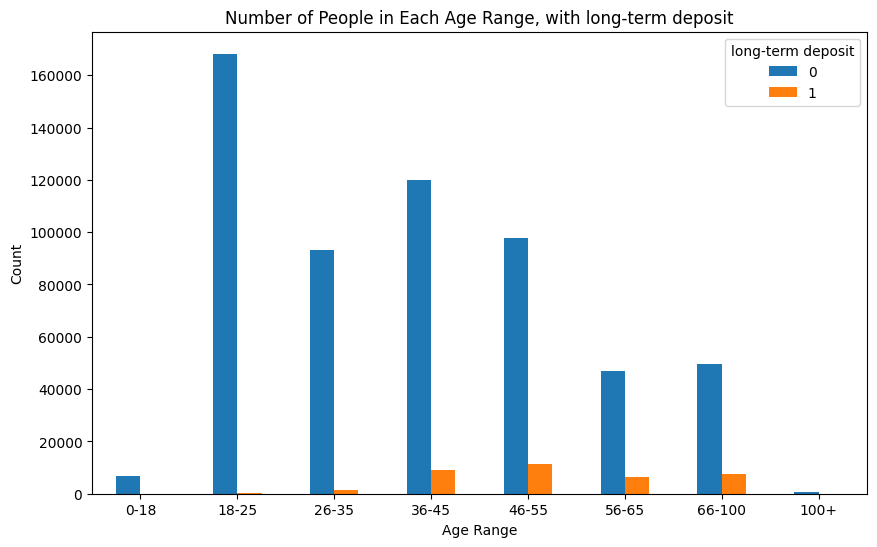

In [78]:
# long-term deposit
#  the age ranges
age_ranges = ['0-18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-100','100+']

# Create a new column with age ranges
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65,100, df['age'].max()], labels=age_ranges)

# number of people in each age range, grouped by long-term deposit
age_range_counts = df.groupby(['age_range','ind_dela_fin_ult1']).size().unstack()

# Plot the bar chart
age_range_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of People in Each Age Range, with long-term deposit')
plt.xticks(rotation='horizontal')
plt.legend(title='long-term deposit')
plt.show()

<Figure size 1600x800 with 0 Axes>

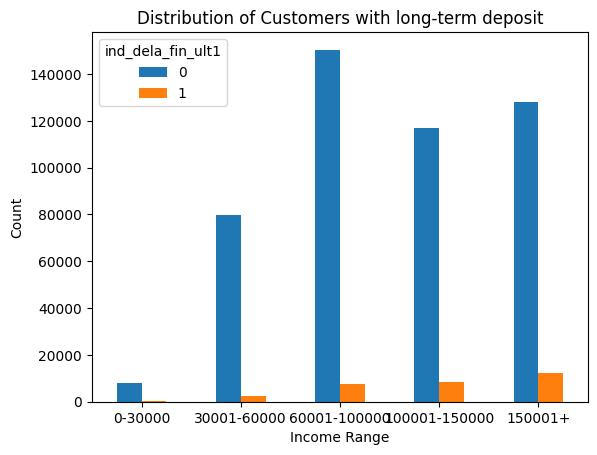

In [81]:
# long-term deposit
income_ranges = ['0-30000', '30001-60000', '60001-100000', '100001-150000', '150001+']

# income ranges column
df['income_range'] = pd.cut(df['renta'], bins=[0, 30000, 60000, 100000, 150000, df['renta'].max()], labels=income_ranges)

# number of customers in each income range
income_range_counts = df.groupby(['income_range','ind_dela_fin_ult1']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(16, 8))
income_range_counts.plot(kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Distribution of Customers with long-term deposit')
plt.xticks(rotation='horizontal')
plt.show()

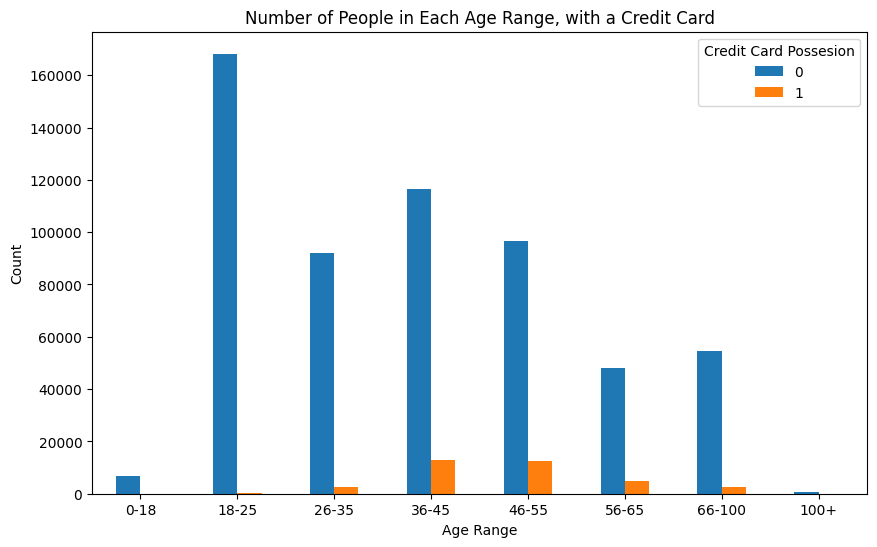

In [82]:
# Credit Card
#  the age ranges
age_ranges = ['0-18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-100','100+']

# Create a new column with age ranges
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65,100, df['age'].max()], labels=age_ranges)

# number of people in each age range, grouped by long-term deposit
age_range_counts = df.groupby(['age_range','ind_tjcr_fin_ult1']).size().unstack()

# Plot the bar chart
age_range_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of People in Each Age Range, with a Credit Card')
plt.xticks(rotation='horizontal')
plt.legend(title='Credit Card Possesion')
plt.show()

<Figure size 1400x800 with 0 Axes>

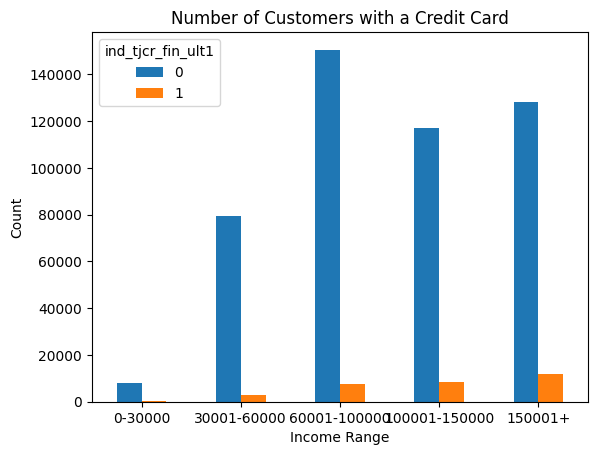

In [83]:
# Credit Card
income_ranges = ['0-30000', '30001-60000', '60001-100000', '100001-150000', '150001+']

# income ranges column
df['income_range'] = pd.cut(df['renta'], bins=[0, 30000, 60000, 100000, 150000, df['renta'].max()], labels=income_ranges)

# number of customers in each income range
income_range_counts = df.groupby(['income_range','ind_tjcr_fin_ult1']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(14, 8))
income_range_counts.plot(kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Number of Customers with a Credit Card')
plt.xticks(rotation='horizontal')
plt.show()

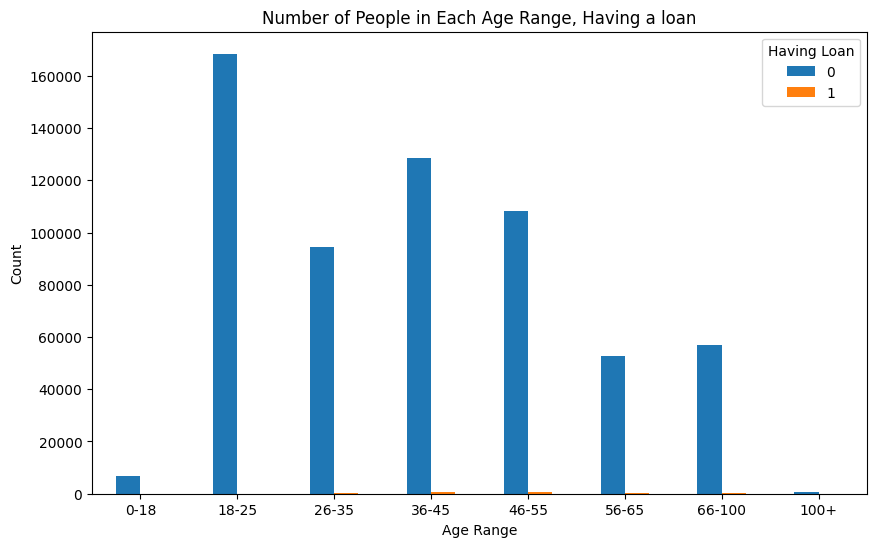

In [85]:
# loans: ind_pres_fin_ult1
#  the age ranges
age_ranges = ['0-18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-100','100+']

# Create a new column with age ranges
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65,100, df['age'].max()], labels=age_ranges)

# number of people in each age range, having loans
age_range_counts = df.groupby(['age_range','ind_pres_fin_ult1']).size().unstack()

# Plot the bar chart
age_range_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of People in Each Age Range, Having a loan')
plt.xticks(rotation='horizontal')
plt.legend(title='Having Loan')
plt.show()

<Figure size 1400x800 with 0 Axes>

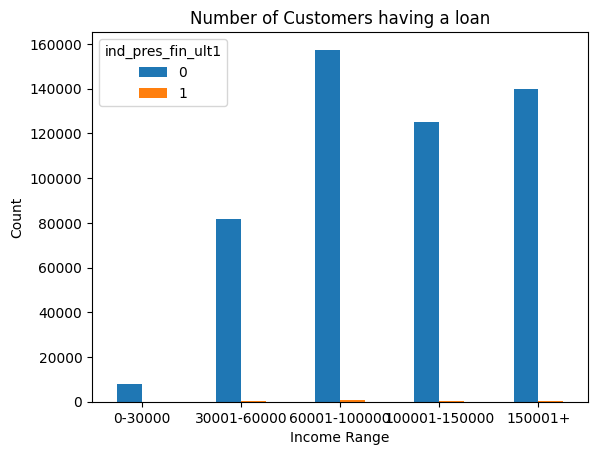

In [86]:
income_ranges = ['0-30000', '30001-60000', '60001-100000', '100001-150000', '150001+']

# income ranges column
df['income_range'] = pd.cut(df['renta'], bins=[0, 30000, 60000, 100000, 150000, df['renta'].max()], labels=income_ranges)

# number of customers in each income range
income_range_counts = df.groupby(['income_range','ind_pres_fin_ult1']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(14, 8))
income_range_counts.plot(kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Number of Customers having a loan')
plt.xticks(rotation='horizontal')
plt.show()

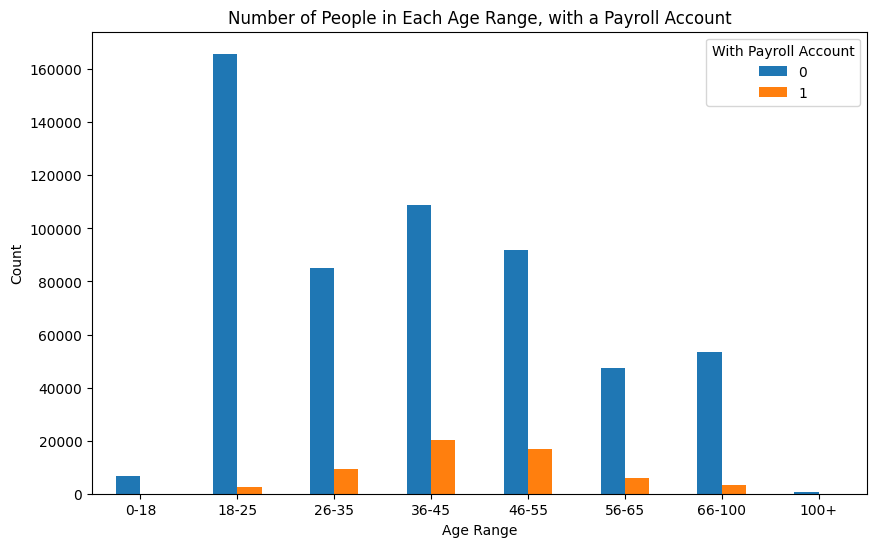

In [88]:
# Payroll Account ind_cno_fin_ult1
#  the age ranges
age_ranges = ['0-18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-100','100+']

# Create a new column with age ranges
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65,100, df['age'].max()], labels=age_ranges)

# number of people in each age range, with Payroll Accounts
age_range_counts = df.groupby(['age_range','ind_cno_fin_ult1']).size().unstack()

# Plot the bar chart
age_range_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of People in Each Age Range, with a Payroll Account')
plt.xticks(rotation='horizontal')
plt.legend(title='With Payroll Account')
plt.show()

<Figure size 1400x800 with 0 Axes>

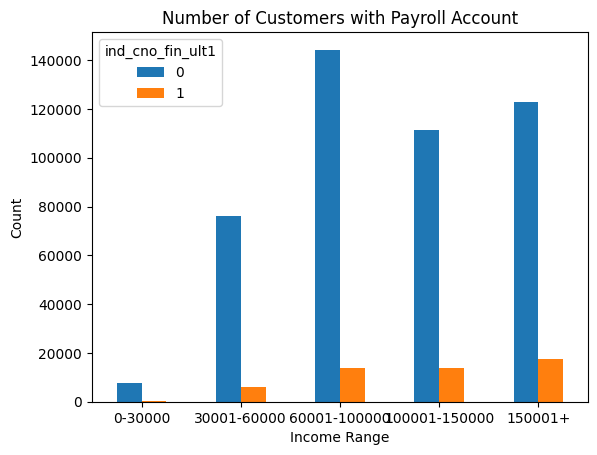

In [90]:
income_ranges = ['0-30000', '30001-60000', '60001-100000', '100001-150000', '150001+']

# income ranges column
df['income_range'] = pd.cut(df['renta'], bins=[0, 30000, 60000, 100000, 150000, df['renta'].max()], labels=income_ranges)

# number of customers in each income range
income_range_counts = df.groupby(['income_range','ind_cno_fin_ult1']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(14, 8))
income_range_counts.plot(kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Number of Customers with Payroll Account')
plt.xticks(rotation='horizontal')
plt.show()

ANCIEN

In [42]:
# visualization of the median income per province
incomes = df2.pivot_table(values='renta', index='nomprov', aggfunc=np.median, dropna=True)
incomes.columns = ['MedianIncome']
incomes.reset_index(inplace=True)
incomes.sort_values(by="MedianIncome",inplace=True)
incomes.head()

,nomprov,MedianIncome
5,BADAJOZ,62237.13
15,CIUDAD REAL,62323.65
28,LUGO,64650.54
27,LERIDA,65027.13
13,CASTELLON,66809.64


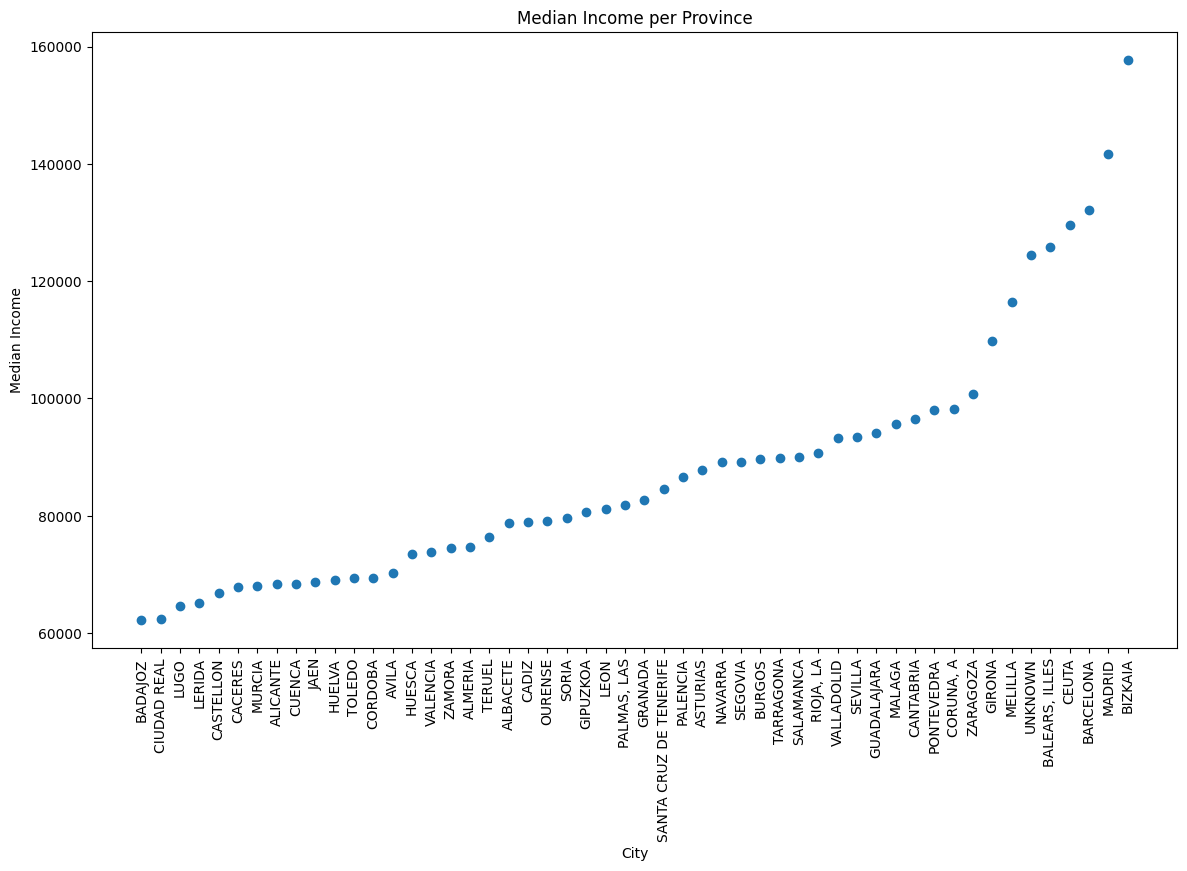

In [55]:
# visualization of the median income per province
plt.figure(figsize=(14,8))
plt.scatter('nomprov','MedianIncome',data=incomes)
plt.xticks(rotation=90)
plt.title("Median Income per Province")
plt.ylabel("Median Income")
plt.xlabel("City")
plt.show()

<ipython-input-105-eab408a596c1>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_counts = df2[df2.columns[23:49]].sum(axis=0)


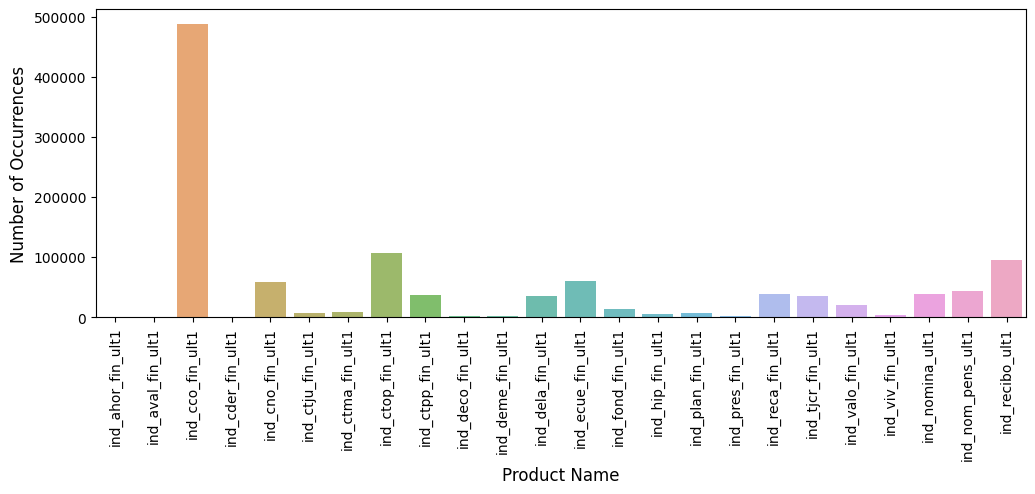

In [105]:
target_counts = df2[df2.columns[23:49]].sum(axis=0)
# print(target_counts)
plt.figure(figsize=(12,4))
sns.barplot(x=target_counts.index, y=target_counts.values, alpha=0.8)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

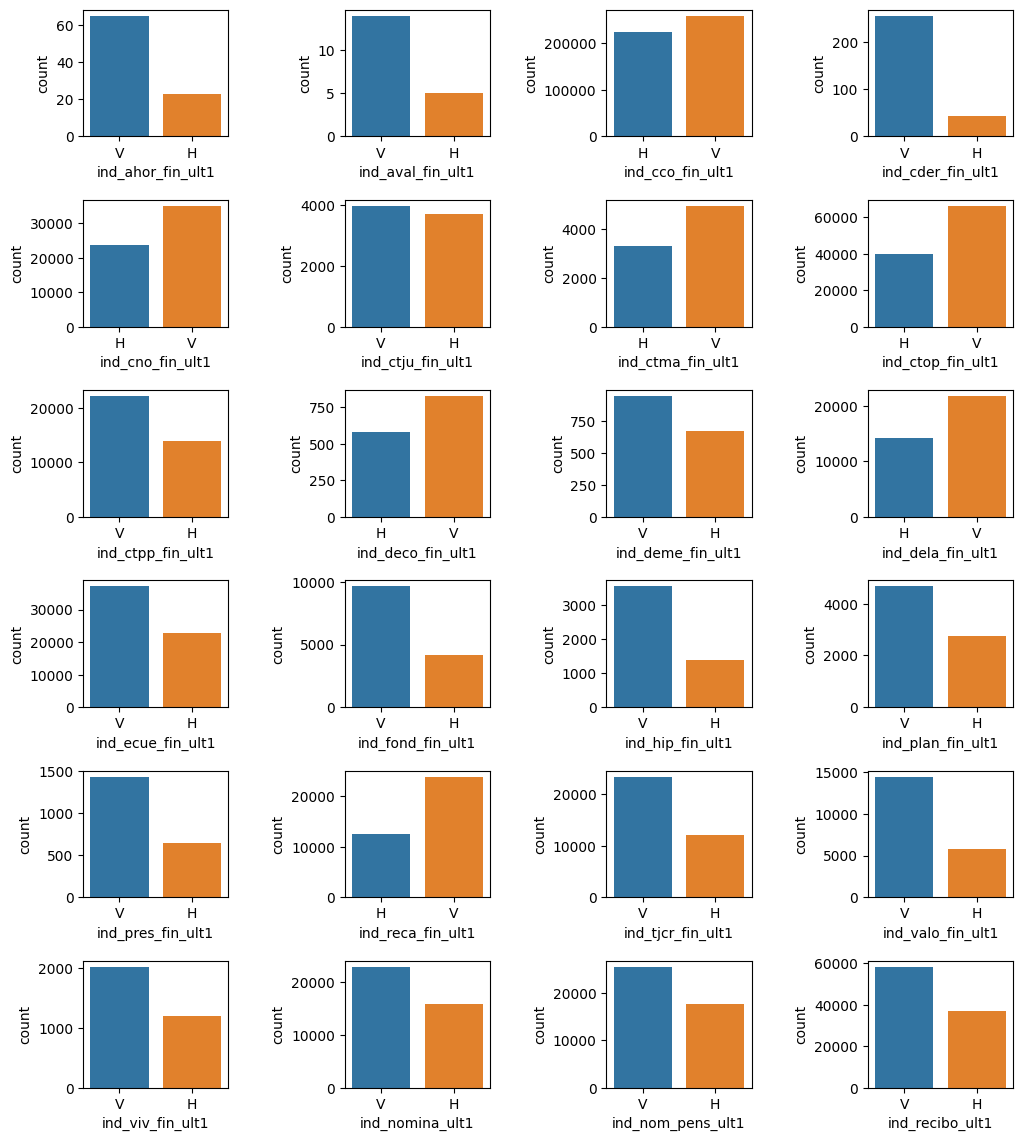

In [89]:
# Product Distrivution by gender
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12,14))
plt.subplots_adjust(wspace=0.8, hspace=0.5)
# fig.tight_layout()
fig_row=0
for col_id in range(24, 48):
    ax_id=col_id-24
    fig_label= df2.columns[col_id]
    feat=df2.columns[col_id]
    fig_col=(col_id)%4
    countplot=sns.countplot(x='sexo', data=df2[(df2[feat]==1) & (df2['sexo'].notna())],ax=axes[fig_row][fig_col])
    countplot.set(xlabel=fig_label)
    if fig_col==3: fig_row+=1